<a href="https://colab.research.google.com/github/Anees31-AI/CIFAR_10/blob/main/Image_classification_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

**Loading Dataset**

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

#Normalize pixel values to range [0,1]
x_train,x_test=x_train/255.0,x_test/255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


**Understanding Data**

Text(0.5, 1.0, 'frog')

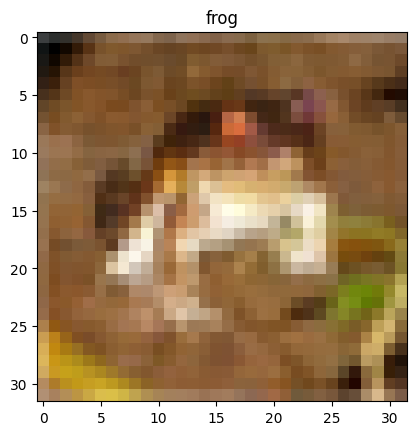

In [4]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#Show the first image
plt.imshow(x_train[0])
plt.title(class_names[int(y_train[0].item())])

**CNN model**

In [8]:
model=models.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

**Compiling the Model**

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Model Training**

In [12]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3452 - loss: 1.7693 - val_accuracy: 0.5475 - val_loss: 1.2710
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5664 - loss: 1.2075 - val_accuracy: 0.6178 - val_loss: 1.0851
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6324 - loss: 1.0372 - val_accuracy: 0.6504 - val_loss: 1.0136
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6725 - loss: 0.9303 - val_accuracy: 0.6771 - val_loss: 0.9433
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7024 - loss: 0.8493 - val_accuracy: 0.6962 - val_loss: 0.8896
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7288 - loss: 0.7805 - val_accuracy: 0.6818 - val_loss: 0.9348
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7467 - loss: 0.7270 - val_accuracy: 0.7100 - val_loss: 0.8639
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7582 - loss: 0.68

**Evaluate the model**

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{test_acc}")
print(f"Test Loss:{test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7079 - loss: 0.8870
Test Accuracy:0.7020999789237976
Test Loss:0.9138336777687073


**Visualize Training Progress**

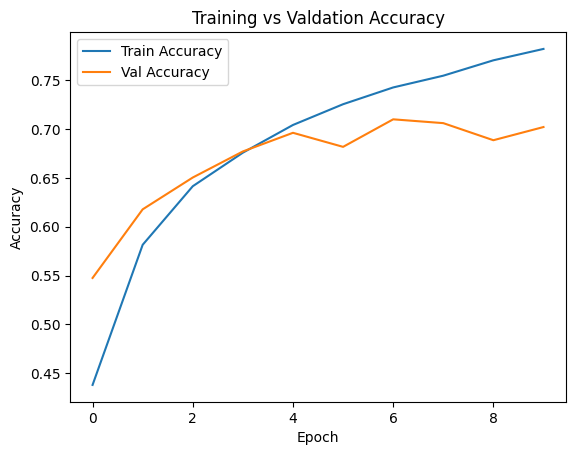

In [15]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Valdation Accuracy')
plt.show()

**Making Predictions**

In [17]:
import numpy as np
predictions=model.predict(x_test)
print("Predicted:",class_names[np.argmax(predictions[0])])
print("Actual:",class_names[int(y_test[0])])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: cat
Actual: cat


**Predict and display first 10 images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


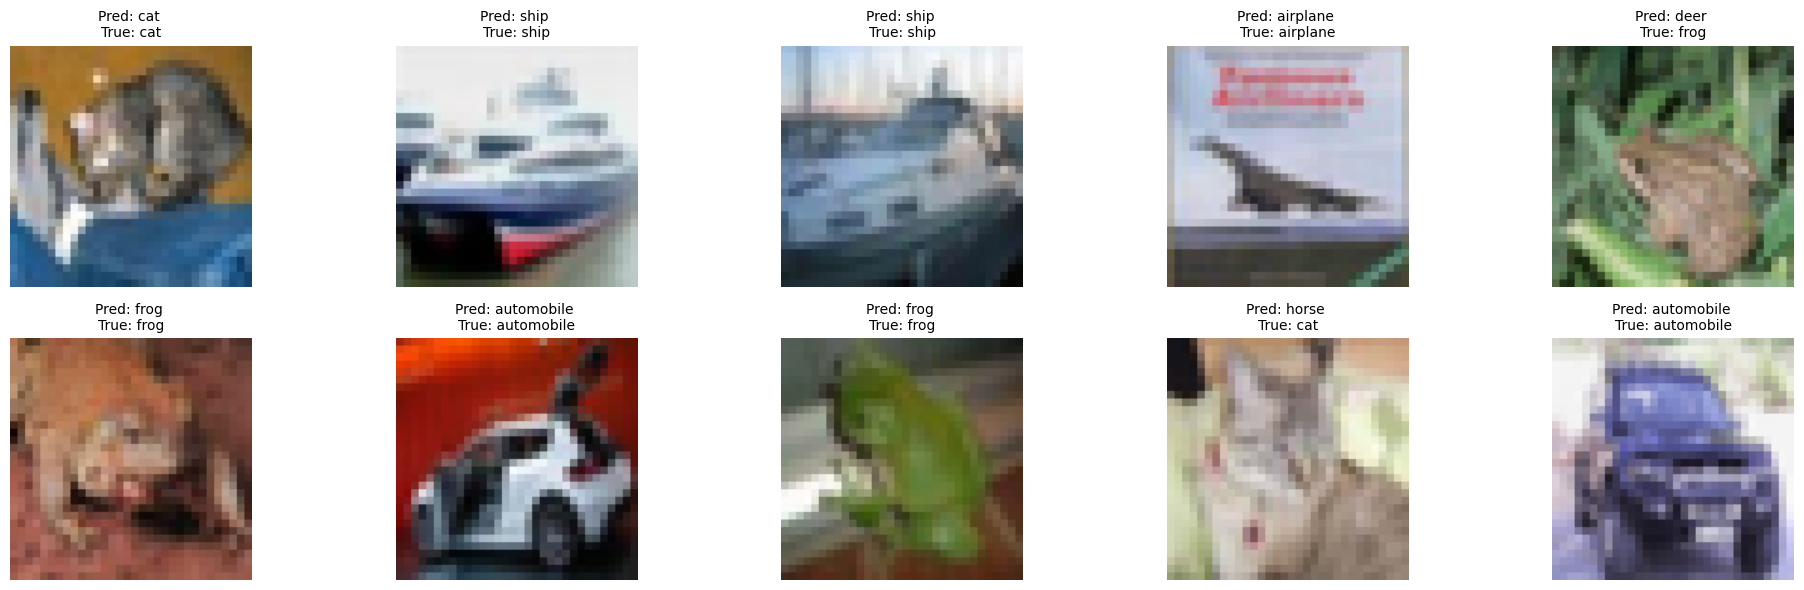

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

predictions = model.predict(x_test[:10])

plt.figure(figsize=(20, 6))  # Wider figure for clarity
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Upscale image using nearest neighbor (no smoothing)
    img = tf.image.resize(x_test[i], [128, 128], method='nearest')
    plt.imshow(img.numpy().astype("float32"))

    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]} \nTrue: {class_names[int(y_test[i])]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.savefig("cifar10_predictions_clear.png", dpi=150)
plt.show()
